# Big Mart Data Set -: EDA Report

### Problem Statement

The data scientists at Big Mart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to make an EDA report to find out the trend of sales of each product at a particular store.
 

## Data Description:

The dataset has 8524 entries with 13 columns. The description of each column is given below.


Data Description
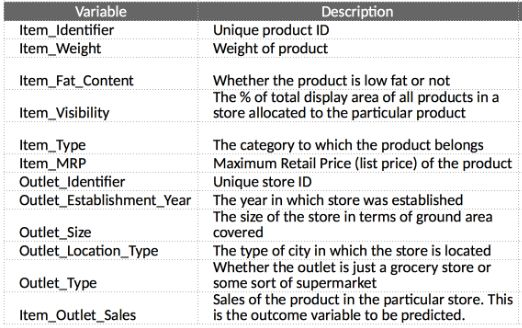

In [156]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [190]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
df=pd.read_csv('https://raw.githubusercontent.com/AyanChawla/Big-Mart/master/Big_mart.csv')

In [41]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [49]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In Describe , only one thing seems a bit strange that Item_Visibilty has 0.0 and then how it has non-zero Item_Outlet_Sales

In [6]:
df.shape

(8523, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Data Preparation

Lets now check **NULL** Values in data 

In [50]:
df.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

It shows that **Item_Weight** and **Outlet_Size** has null values.

In [53]:
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

It shows that total no. of stores are **10** and **4** types of store.

Now Lets see which columns are Categorical and Continous

First we will drop Item_Identifier , Outlet_Identifier

In [96]:
df1=df.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

In [97]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1,343.5528
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [77]:
categorical_columns = [x for x in df1.dtypes.index if df1.dtypes[x]=='object']

In [78]:
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [79]:
continous_columns = [x for x in df1.dtypes.index if df1.dtypes[x]!='object']

In [80]:
continous_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [95]:
for x in categorical_columns:
    
    print(x)
    print(df[x].value_counts())
    print('\n')

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: 

It shows that in Item_Fat_Cotent there are 2 coulmns , others are just same with different names

## Data Cleaning


Mainly it has Three Problems-:
    1. Item_Visibilty has 0.0 and it has non-zero Item_Outlet_Sales
    2. Item_Weight and Outlet_Size has null values.
    3. In Item_Fat_Content,Some of ‘Low Fat’ values are miscoded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’are
       mentioned as ‘reg’.


Lets now work on our First Problem

In [103]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [139]:
visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Type')

In [140]:
visibility_avg

,Item_Visibility
Item_Type,
Baking Goods,0.073973
Breads,0.070742
Breakfast,0.088061
Canned,0.071594
Dairy,0.076463
Frozen Foods,0.069556
Fruits and Vegetables,0.073351
Hard Drinks,0.070102
Health and Hygiene,0.058720


In [123]:
missing_values = (df['Item_Visibility'] == 0)


In [124]:
df.loc[missing_values,'Item_Visibility']= df.loc[missing_values,'Item_Type'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

In [125]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [128]:
sum(df['Item_Visibility'] == 0)

0

Now Our Second Problem

Item_Weight and Outlet_Size has null values

In [129]:
df.groupby('Outlet_Location_Type').Outlet_Size.value_counts(dropna=False)

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                NaN            1855
                      Small           930
Tier 3                Medium         1863
                      High            932
                      NaN             555
Name: Outlet_Size, dtype: int64

In [130]:
df.groupby('Outlet_Type').Outlet_Size.value_counts(dropna=False)

Outlet_Type        Outlet_Size
Grocery Store      NaN             555
                   Small           528
Supermarket Type1  Small          1860
                   NaN            1855
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [131]:
df.groupby('Outlet_Type').Outlet_Location_Type.value_counts(dropna=False)

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 3                   555
                   Tier 1                   528
Supermarket Type1  Tier 2                  2785
                   Tier 1                  1860
                   Tier 3                   932
Supermarket Type2  Tier 3                   928
Supermarket Type3  Tier 3                   935
Name: Outlet_Location_Type, dtype: int64

In [133]:
df.groupby('Outlet_Identifier').Outlet_Size.value_counts(dropna=False)

Outlet_Identifier  Outlet_Size
OUT010             NaN            555
OUT013             High           932
OUT017             NaN            926
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT045             NaN            929
OUT046             Small          930
OUT049             Medium         930
Name: Outlet_Size, dtype: int64

In [135]:
df.groupby('Outlet_Identifier').Outlet_Type.value_counts(dropna=False)

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store        555
OUT013             Supermarket Type1    932
OUT017             Supermarket Type1    926
OUT018             Supermarket Type2    928
OUT019             Grocery Store        528
OUT027             Supermarket Type3    935
OUT035             Supermarket Type1    930
OUT045             Supermarket Type1    929
OUT046             Supermarket Type1    930
OUT049             Supermarket Type1    930
Name: Outlet_Type, dtype: int64

In [138]:
visibility_avg1 = df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Identifier')
visibility_avg1

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,339.351662
OUT013,2298.995256
OUT017,2340.675263
OUT018,1995.498739
OUT019,340.329723
OUT027,3694.038558
OUT035,2438.841866
OUT045,2192.384798
OUT046,2277.844267


Hence we can conclude that 
1. Grocery Store can be small and medium but judjing by average sales, it must be small
2. Supermarket Type1 has 1855 null values that is total of OUT045(929) and OUT017(926) and it has small and high but not medium, so its missing medium. Also we can judge it by missing values.

We have to substitute Grocery store as small and Supermarket Type1 as medium

In [141]:
df.loc[df.Outlet_Identifier.isin(['OUT010']), 'Outlet_Size'] = 'Small'

In [142]:
df.loc[df.Outlet_Identifier.isin(['OUT017','OUT045']), 'Outlet_Size'] = 'Medium'

In [144]:
sum(df['Outlet_Size'].isnull())

0

Now Lets work on Item_Weight

In [146]:
item_avg_weight = df.groupby('Item_Identifier').Item_Weight.mean()

In [165]:
df.Item_Weight.fillna(0, inplace = True)

In [166]:
for index, row in df.iterrows():
    if(row.Item_Weight == 0):
        df.loc[index, 'Item_Weight'] = item_avg_weight[row.Item_Identifier]

In [167]:
sum(df['Item_Weight'].isnull())

4

In [169]:
df.Item_Weight.dtype

dtype('float64')

In [171]:
df.query("Item_Weight=='Nan'")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


There weight is not given anywhere soo, there average is not calculated. So, now its better if we Drop these because they are gonna effect very little.

In [181]:
df=df.dropna()

In [182]:
df.query("Item_Weight=='Nan'")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


Null Values are removed succsefully.

Now lets work on our Third Problem.

In Item_Fat_Content,Some of ‘Low Fat’ values are miscoded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’are
   mentioned as ‘reg’.

In [191]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

In [184]:
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

We are all set to Proceed Further

# Derived Metrics

These are those columns that we create to look at the data set more precisely. We will derive some variables that will help us understand the data better.Like if we carefully look at the column *Item_Identifier* in the following way.

In [192]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [193]:
df['Item_Type_Combined'].value_counts()

FD    6121
NC    1599
DR     799
Name: Item_Type_Combined, dtype: int64

If we look at it, there are precisely 3 types of items.
1. FD  
2. NC 
3. DR  

After some searching we found their full forms
1. FD : Freeze Dried  
2. NC : Non Consumable
3. DR : Drinks


In [205]:
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

Now , you must ask a question that why a NC item is having fat_content, soo lets seperate them.

In [209]:
df.loc[df['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Consumable"

In [210]:
df['Item_Fat_Content'].value_counts()

Low Fat           3917
Regular           3003
Non-Consumable    1599
Name: Item_Fat_Content, dtype: int64

We can make another variable, How many years it has been Open 

In [211]:
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    8519.000000
mean       15.162108
std         8.369105
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [212]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Consumable,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


Now we are Fully ready to proceed With Univariate Analysis.

# Univariate Analysis

First we will look at the continous variables.

In [223]:
continous_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

### Item_Outlet_Sales
Lets look broadly at the Sales

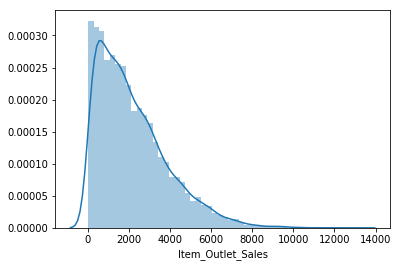

In [217]:
sns.distplot(df['Item_Outlet_Sales'])

It is skewed Left

### Item_Weight

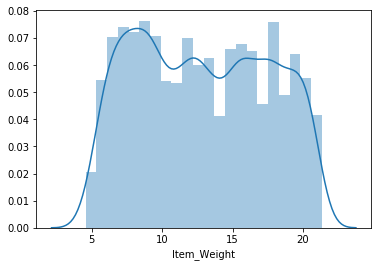

In [218]:
sns.distplot(df['Item_Weight'])

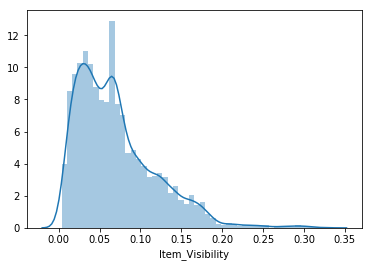

In [221]:
sns.distplot(df['Item_Visibility'])

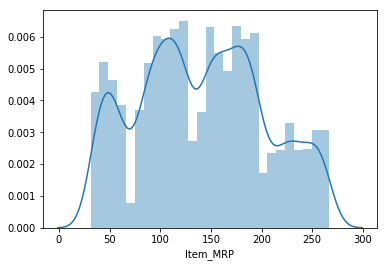

In [220]:
sns.distplot(df['Item_MRP'])

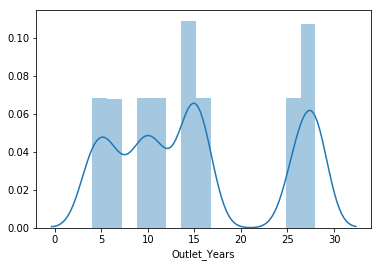

In [224]:
sns.distplot(df['Outlet_Years'])

Now lets look at Categorical Columns

In [225]:
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

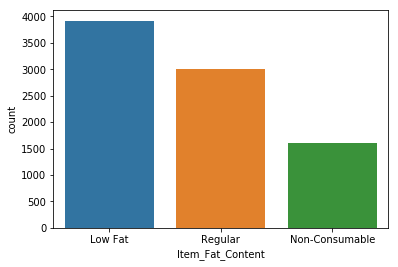

In [226]:
sns.countplot(df['Item_Fat_Content'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

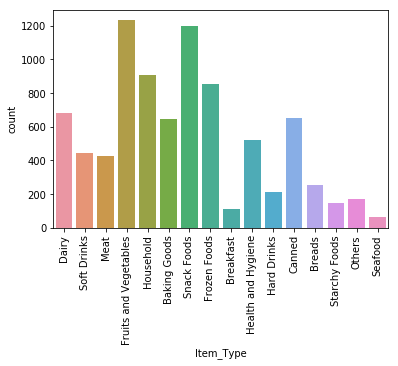

In [229]:
sns.countplot(df['Item_Type'])
plt.xticks(rotation=90)

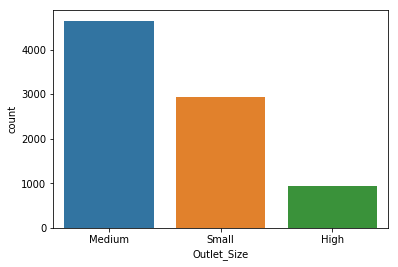

In [230]:
sns.countplot(df['Outlet_Size'])

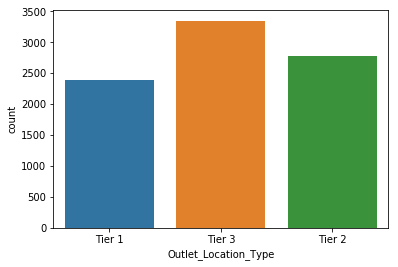

In [231]:
sns.countplot(df['Outlet_Location_Type'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

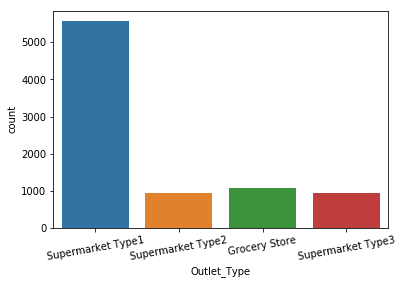

In [238]:
sns.countplot(df['Outlet_Type'])
plt.xticks(rotation=10)

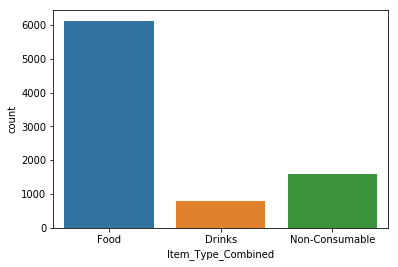

In [240]:
sns.countplot(df['Item_Type_Combined'])

# Bivariate Analysis
Now lets look at Bivariate Analysis.

In [242]:
corr=df.corr()

In [243]:
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017871,0.025975,-0.013426,0.013168,0.013426
Item_Visibility,-0.017871,1.000000,-0.004917,-0.077760,-0.133590,0.077760
Item_MRP,0.025975,-0.004917,1.000000,0.004599,0.567803,-0.004599
Outlet_Establishment_Year,-0.013426,-0.077760,0.004599,1.000000,-0.049083,-1.000000
Item_Outlet_Sales,0.013168,-0.133590,0.567803,-0.049083,1.000000,0.049083
Outlet_Years,0.013426,0.077760,-0.004599,-1.000000,0.049083,1.000000


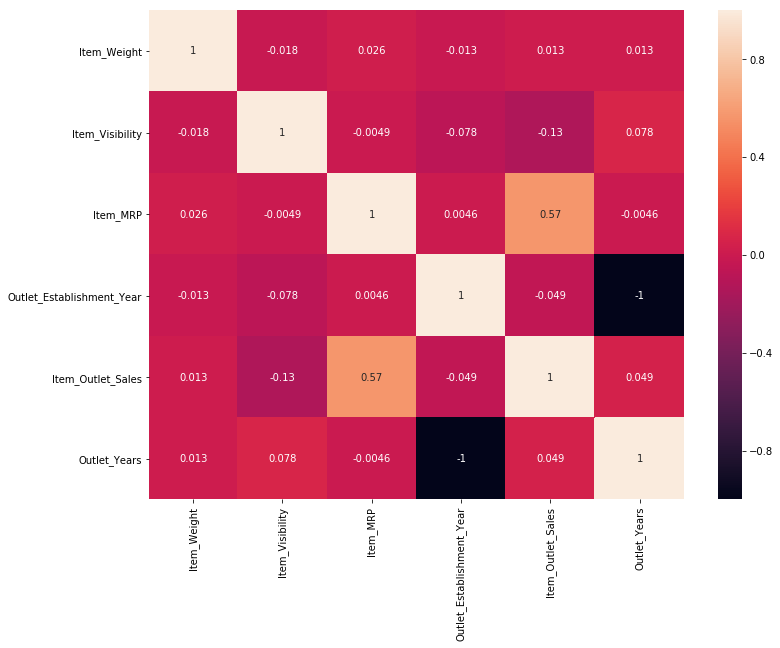

In [249]:
plt.subplots(figsize=(12, 9))
sns.heatmap(corr,annot=True)

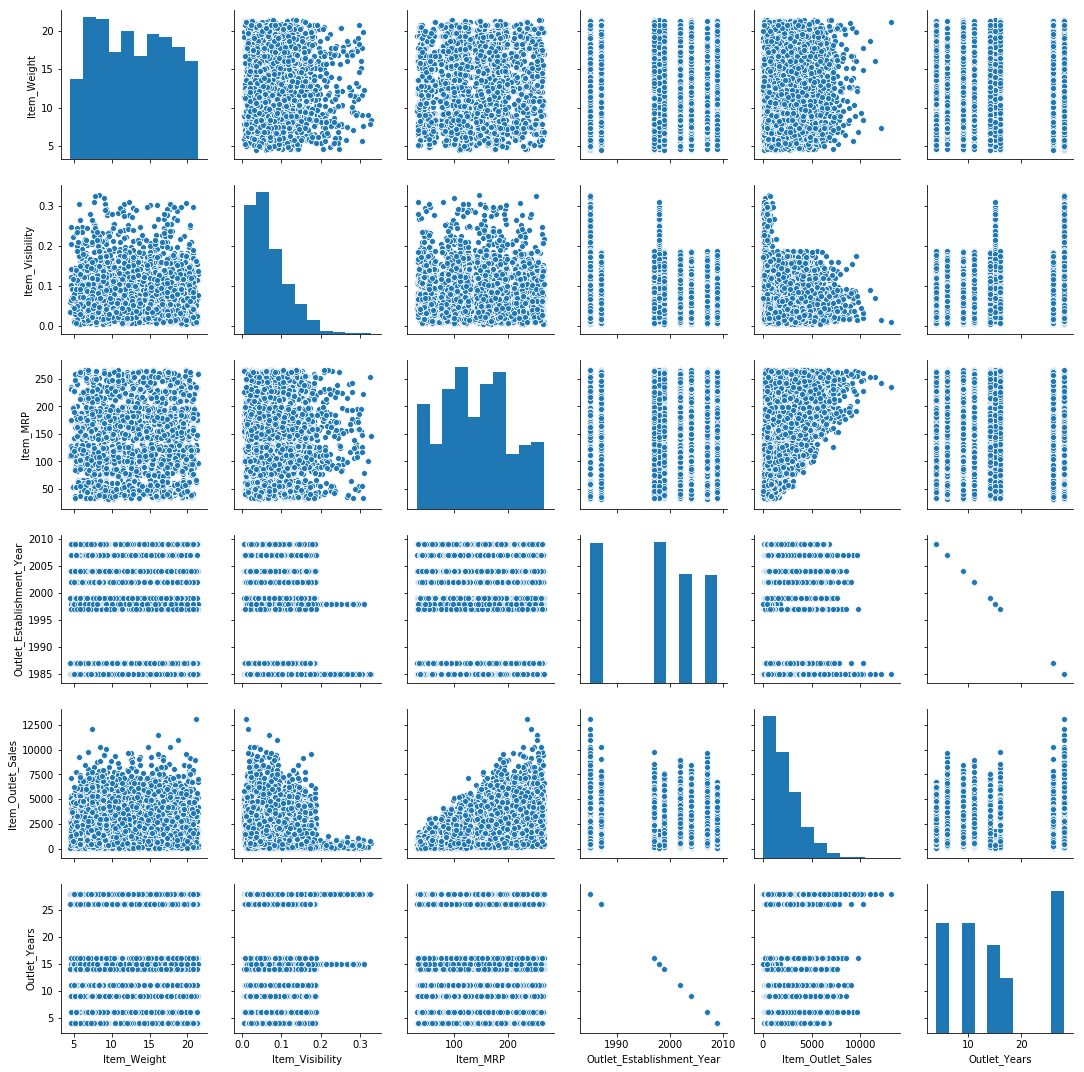

In [250]:
sns.pairplot(df)

### Item_Weight VS Item_Outlet_Sales

In [251]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Consumable,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


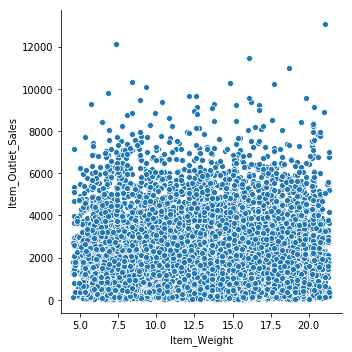

In [256]:
sns.relplot(x="Item_Weight", y="Item_Outlet_Sales", data=df,ci=None)

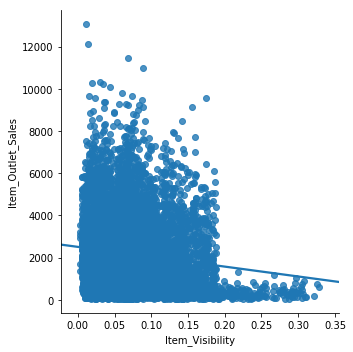

In [258]:
sns.lmplot(x="Item_Visibility", y="Item_Outlet_Sales", data=df,ci=None)

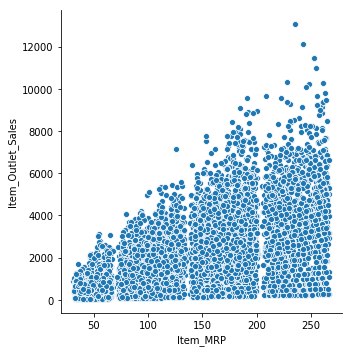

In [260]:
sns.relplot(x="Item_MRP", y="Item_Outlet_Sales", data=df,ci=None)

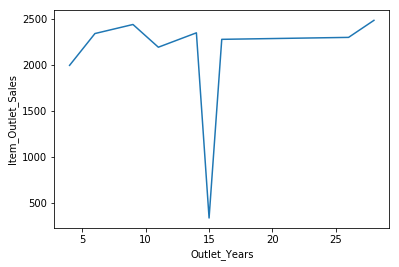

In [263]:
sns.lineplot(x="Outlet_Years", y="Item_Outlet_Sales", data=df,ci=None)

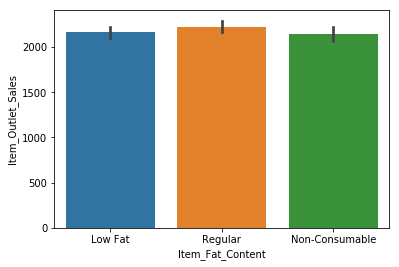

In [264]:
sns.barplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

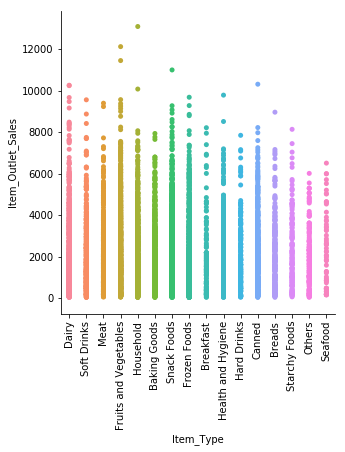

In [269]:
sns.catplot(x="Item_Type", y="Item_Outlet_Sales", data=df,jitter=False)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

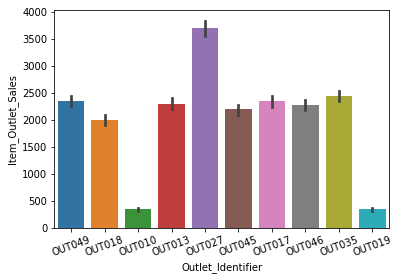

In [274]:
sns.barplot(x="Outlet_Identifier", y="Item_Outlet_Sales", data=df)
plt.xticks(rotation=20)

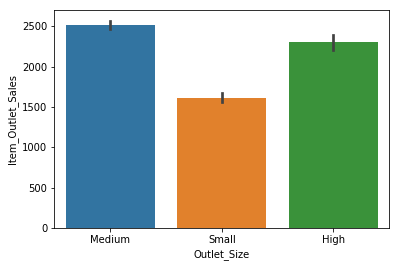

In [275]:
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data=df)

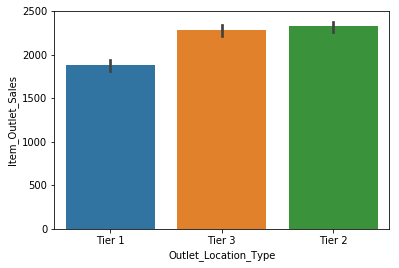

In [276]:
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

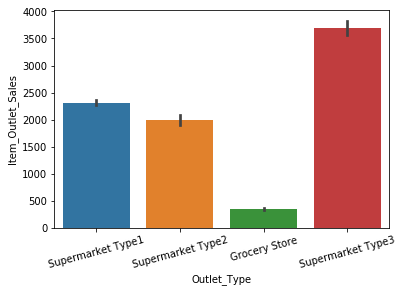

In [278]:
sns.barplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df)
plt.xticks(rotation=15)

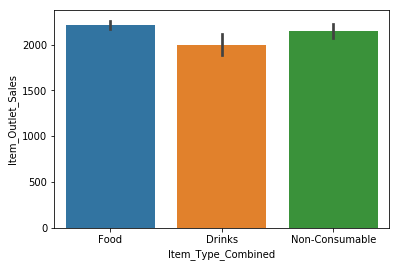

In [279]:
sns.barplot(x="Item_Type_Combined", y="Item_Outlet_Sales", data=df)

# Multivariate Analysis

In [280]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.068513,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Consumable,0.061322,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


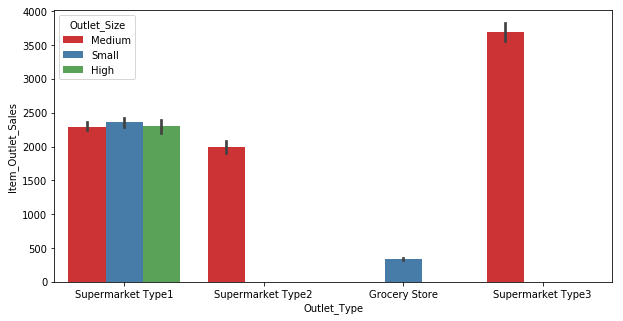

In [306]:
plt.figure(figsize = (10,5))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales',hue='Outlet_Size', data=df, palette="Set1")

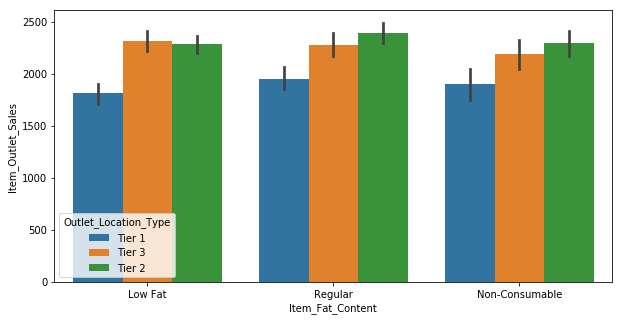

In [302]:
plt.figure(figsize = (10,5))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales',hue='Outlet_Location_Type', data=df)

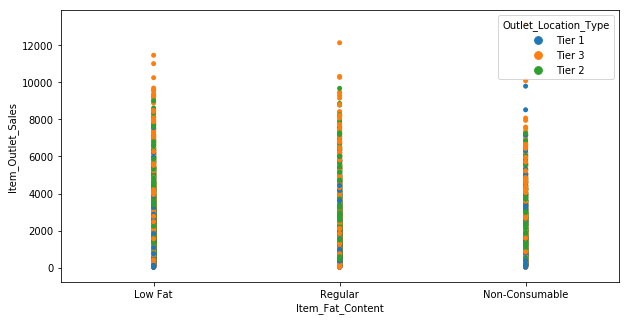

In [310]:
plt.figure(figsize = (10,5))
sns.stripplot(x='Item_Fat_Content', y='Item_Outlet_Sales',hue='Outlet_Location_Type', data=df,jitter=False)